<a href="https://colab.research.google.com/github/goglom/data_processing_methods_in_scientific_research/blob/main/problem_2/convolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import numpy.fft as fft
import matplotlib.pyplot as plt

In [ ]:
def conv_classic(f, g) -> np.array:
    N, M = map(len, (f, g))
    result = np.zeros(N + M - 1)

    for i in range(N):
        for j in range(M):
            result[i + j] += f[i] * g[j] 
    
    return result

In [ ]:
assert np.all(conv_1([1, 2, 3], [4, 5]) == conv_1([4, 5], [1, 2, 3]))

In [ ]:
def conv_fft(f, g) -> np.array:
    N, M = map(len, (f, g))
    f_ex = np.zeros(N + M - 1)
    g_ex = np.zeros_like(f_ex)
    f_ex[:N] = f
    g_ex[:M] = g

    return np.real(fft.ifft(fft.fft(f_ex) * fft.fft(g_ex)))

In [ ]:
def plotComp(f, g):
    results = [conv_classic(f, g), conv_fft(f, g), np.convolve(f, g)]
    titles = ["summation", "fft", "numpy"]
    plt.figure(figsize=(14, 4), dpi=100)

    for i, data in enumerate(results):
        plt.subplot(1, len(results), i + 1)
        plt.title(titles[i])
        plt.plot(data)
        plt.grid()

    plt.tight_layout()

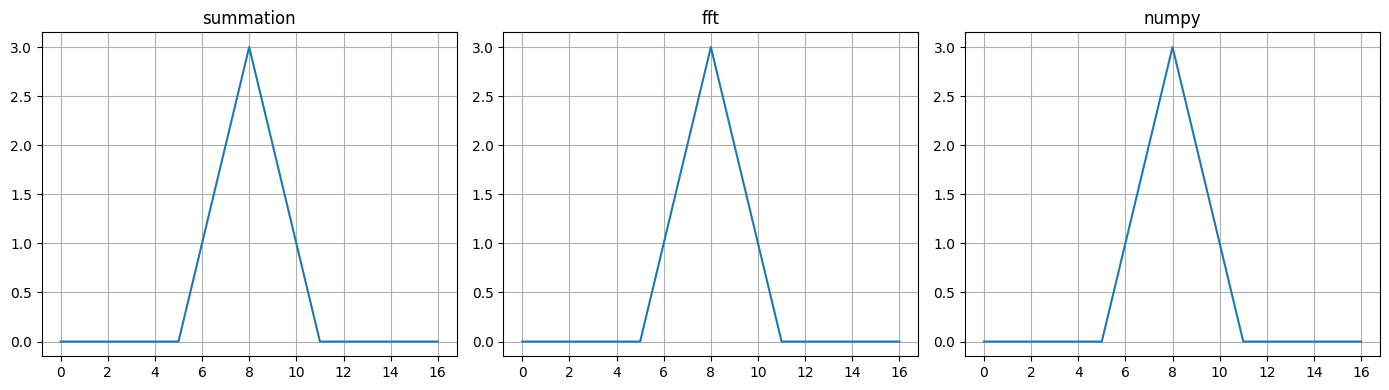

In [ ]:
f = np.array([0, 0, 0, 1, 1, 1, 0, 0, 0])
plotComp(f, f)